# Data Import

In [1]:
import pandas as pd

# Load and preprocess data
train_file = '../data/train.csv'
df = pd.read_csv(train_file)
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


# Feature Exploration

## Essay Length vs Score

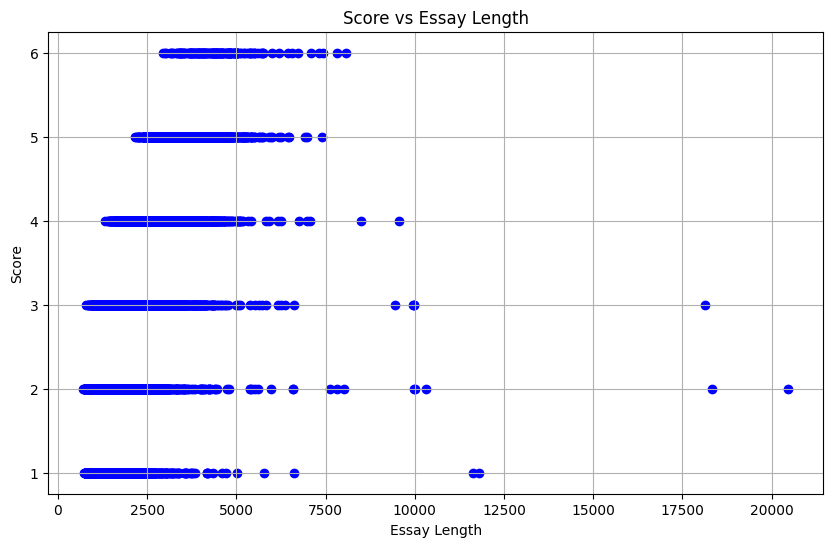

   score  essay_length
0      1        1300.5
1      2        1292.0
2      3        1877.5
3      4        2590.0
4      5        3455.0
5      6        4410.5


In [3]:
import matplotlib.pyplot as plt

df['essay_length'] = df['full_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(df['essay_length'], df['score'], color='blue')
plt.title('Score vs Essay Length')
plt.xlabel('Essay Length')
plt.ylabel('Score')
plt.grid(True)
plt.show()
median_lengths_by_score = df.groupby('score')['essay_length'].median().reset_index()
print(median_lengths_by_score)

## Sentence Length

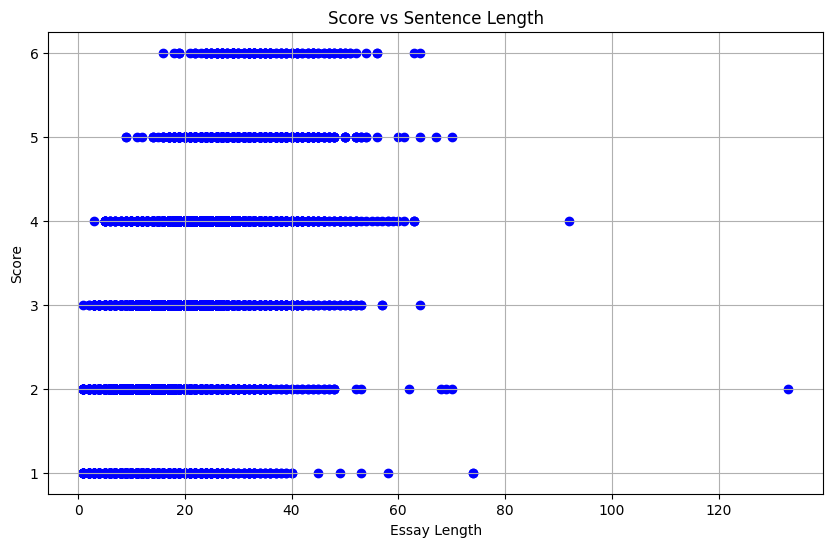

In [11]:
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd

# Load NLTK resources
# nltk.download('punkt')

# Function to calculate sentence count
def calculate_sentence_count(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Assuming your DataFrame is already loaded, let's assume it's called df
# Calculate sentence count for each essay
df['sentence_count'] = df['full_text'].apply(calculate_sentence_count)

plt.figure(figsize=(10, 6))
plt.scatter(df['sentence_count'], df['score'], color='blue')
plt.title('Score vs Sentence Length')
plt.xlabel('Essay Length')
plt.ylabel('Score')
plt.grid(True)
plt.show()

## Text Processing by Edward

   score  avg_word_length
0      1         5.098321
1      2         5.071671
2      3         5.146123
3      4         5.225773
4      5         5.332527
5      6         5.462684


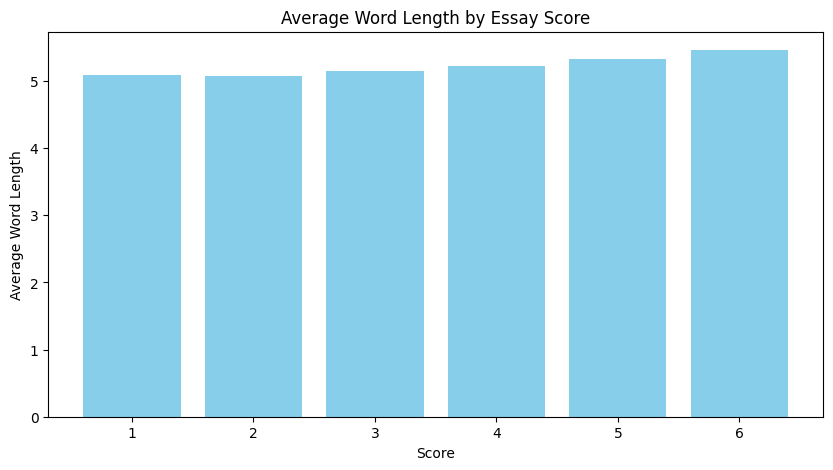

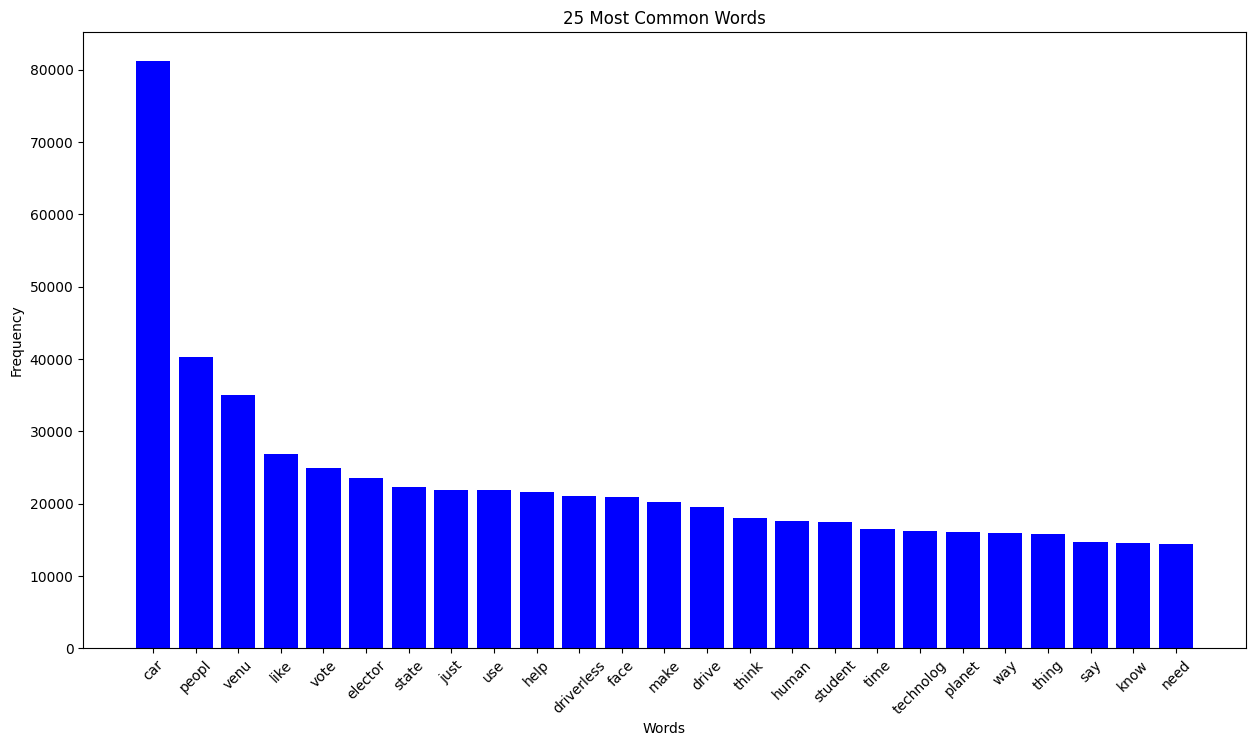

In [12]:
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import punkt
import re
import string
import numpy as np
from scipy import stats

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from nltk import FreqDist

def comprehensive_text_preprocessing(text):
    # Lowercase and remove HTML tags
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

    return " ".join(words)  # Return the processed text

def average_word_length(text):
    words = text.split()  # Split the text into words
    if not words:
        return 0  # Avoid division by zero if there are no words
    total_length = sum(len(word) for word in words)
    return total_length / len(words)

def calculate_word_lengths(text):
    words = word_tokenize(text)
    return [len(word) for word in words]

# Applying the comprehensive_text_preprocessing to the 'full_text' column
df['processed_text'] = df['full_text'].apply(comprehensive_text_preprocessing)

# Calculating average word length
df['avg_word_length'] = df['processed_text'].apply(average_word_length)
# Assuming your DataFrame is already loaded and named df
# Calculate word lengths for each essay
df['word_lengths'] = df['processed_text'].apply(calculate_word_lengths)
# Group by 'score' and calculate the mean of 'avg_word_length' for each score
average_lengths_by_score = df.groupby('score')['avg_word_length'].mean().reset_index()

# Collect all word lengths by score
word_lengths_by_score = {score: [] for score in df['score'].unique()}
for index, row in df.iterrows():
    word_lengths_by_score[row['score']].extend(row['word_lengths'])

# Print the results
print(average_lengths_by_score)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(average_lengths_by_score['score'], average_lengths_by_score['avg_word_length'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Essay Score')
plt.xticks(average_lengths_by_score['score'])  # Set x-ticks to be the scores
plt.show()

# Assuming 'processed_text' is a column where text is already tokenized and cleaned
all_words = [word for text in df['processed_text'] for word in word_tokenize(text)]
freq_dist = FreqDist(all_words)

# Get the 25 most common words
most_common_words = freq_dist.most_common(25)

# Extracting words and their counts for plotting
words, counts = zip(*most_common_words)


plt.figure(figsize=(15, 8))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('25 Most Common Words')
plt.xticks(rotation=45)
plt.show()

## Word2Vec PreProcessing

In [16]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences=df['processed_text'], vector_size=100, window=5, min_count=1, workers=4)

essay_embeddings = [word2vec_model.wv[word] for word in df['processed_text'].iloc[0] if word in word2vec_model.wv]


In [29]:
print(essay_embeddings[:2])

[array([-0.03457667,  0.18662179, -0.22151417, -0.074602  ,  0.21667385,
        0.1129407 ,  0.05512986,  0.21060921,  0.23481612, -0.2709861 ,
       -0.09257311, -0.33367947,  0.12911233,  0.20730315, -0.14981537,
       -0.16108476, -0.15586565,  0.20796688,  0.15453592,  0.07451665,
       -0.27160358,  0.27697474, -0.55277264,  0.34447572, -0.38039875,
       -0.15618852,  0.15666336, -0.06158947, -0.14129855, -0.25375727,
       -0.09007083, -0.4454027 , -0.20606191,  0.2690518 , -0.49109796,
        0.36067706,  0.09420267,  0.32755262, -0.08366401,  0.2781893 ,
        0.46458337,  0.0199595 ,  0.36169627,  0.38806793,  0.05459959,
        0.37923482,  0.20254034, -0.31470644,  0.1762892 ,  0.18854974,
       -0.1372394 , -0.34088916,  0.07786278,  0.07921399, -0.0052754 ,
        0.26715264,  0.027645  ,  0.23349953, -0.23845913, -0.02651751,
        0.28297856,  0.3068485 ,  0.0697364 , -0.05073445, -0.04457194,
        0.62717193,  0.08608828, -0.02055951,  0.4773899 , -0.0

## Word2Vec Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report

X = df['processed_text']
y = df['score']

def get_average_embedding(text):
    words = comprehensive_text_preprocessing(text)
    # Filter out words that are not in the vocabulary of the Word2Vec model
    words_in_vocab = [word for word in words if word in word2vec_model.wv]
    if len(words_in_vocab) > 0:
        return np.mean([word2vec_model.wv[word] for word in words_in_vocab], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no words in vocabulary

X_features = X.apply(get_average_embedding)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features.tolist(), y, test_size=0.2, random_state=42)


### Linear

In [40]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict scores on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

def convert_to_class(score):
    if score < 2.5:
        return 0  # Class 0 for low scores
    elif score < 4:
        return 1  # Class 1 for medium scores
    else:
        return 2  # Class 2 for high scores

# Convert regression predictions and true labels into class labels
y_pred_class = [convert_to_class(score) for score in y_pred]
y_test_class = [convert_to_class(score) for score in y_test]

# Print classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Mean Squared Error: 0.6755040711161031
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1225
           1       0.45      0.73      0.56      1265
           2       0.93      0.20      0.33       972

    accuracy                           0.57      3462
   macro avg       0.70      0.55      0.53      3462
weighted avg       0.68      0.57      0.55      3462



### SVM

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Create classifier
svc = SVC(kernel='linear', random_state=42)

# Fit model on training data
svc.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error:", mse)


Accuracy: 0.3653957250144425
Mean Squared Error: 1.1086077411900634


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_lr = LogisticRegression(solver='liblinear', max_iter = 1000)

# Fit model on training data
model_lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = model_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)


Accuracy: 0.38157134604274984
Mean Squared Error: 1.0932986712882726


### RandomForest

In [52]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict scores on test set
y_pred_rf = rf_model.predict(X_test)

# Convert regression predictions into class labels
y_pred_rf_class = [convert_to_class(score) for score in y_pred_rf]


In [53]:
from sklearn.metrics import classification_report, mean_squared_error

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Calculate and print regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.30      0.42      1225
           1       0.39      0.88      0.54      1265
           2       0.84      0.04      0.07       972

    accuracy                           0.44      3462
   macro avg       0.63      0.41      0.34      3462
weighted avg       0.61      0.44      0.36      3462

Random Forest Mean Squared Error: 0.8107831022530329


### Gradient Boosting

In [58]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict scores on test set
y_pred_gb = gb_model.predict(X_test)

# Calculate mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)


Mean Squared Error (Gradient Boosting): 0.848709461842637
